# Emlékérmék adatainak scrapelése a penzvero.hu-ról és az adatok rövid elemzése


A beadandóm témája az emlékérmék, ezeknek az adatait scrapelem le, majd röviden elemzem, vizualizálom a fontosabb dolgokat.

Az MNB (a Pénzverő Zrt-n keresztül) minden évben kiad különböző emlékérmeket, nagyjából 10-20 különbözőt, mindegyiket pár ezres, esetleg tízezres darabszámban. Alapvetően háromféle van, színesfém, ezüst és arany. Mindegyiknek fontos tulajdonsága, hogy hivatalos fizetőeszköz, az MNB bármikor korlátozás nélkül beváltja névértéken. A színesfém és az ezüst pénzeket a kibocsátást követő három, illetve egy hónapig névértéken lehet megvenni a Pénzverőtől, utána piaci áron (névértéken fölül). Az arany érmék a kibocsátás pillanatától kezdve piaci áron vásárolhatók meg. Ez gyűjtőként azt az érdekes helyzetet teremti meg, hogy ha az ember nem arany pénzeket gyűjt, és a kibocsátáshoz közeli időpontban veszi meg az érméket, akkor a gyűjteményének az értéke nem csökkenhet, csak nőhet, így befektetésként is lehet rá tekinteni, annak egy olyan speciális esete, amikor nominálisan nem csökkenhet az értéke a befektetésnek, nőni viszont nőhet.

A Pénzverőnél nem csak ez az egyetlen terméktípus, amit meg lehet venni, vannak mások is, de az érdeklődésem csak az emlékérmékre korlátozódik, így a beadandóm is ezt követi.

Mivel gyűjtők veszik, és korlátozott a kínálat, ezért jellemzően fel szokott menni az áruk. A pénzverő.hu-n nem csak az idei, hanem az előző évek érméit is meg lehet venni, így ezt lescrapelve kaphatok egy képet arról, hogy mennyire mennek fel az árak, és talán arról is valamennyit, hogy mi befolyásolja ezt.

Nyilván sok boltban, webshopban meg lehet vásárolni ezeket az érméket, az igazi az lenne, ha több webshop kínálatát lescrapelném, de az túlmutatna ennek a beadandónak a keretein. (Később majd valószínűleg megcsinálom egyszer.)

## Scrapelés

In [677]:
#importálások
from bs4 import BeautifulSoup
import urllib
import matplotlib
from tqdm import tqdm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [2]:
#alapbeállítások

user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
headers = {'User-Agent':user_agent,} 
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
headers = {'User-Agent':user_agent,} 

In [3]:
kezdourl = 'https://penzvero.hu/tipus/emlekerme/'
alap_url='https://penzvero.hu/tipus/emlekerme/page/'
webshoplink_list=[kezdourl]
#manuálisan megnéztem, hogy összesen 15 oldal van, később ezt majd kell módosítani
for number in range(2,16):
    link=alap_url+str(number)
    webshoplink_list.append(link)
    
#ebben a listában vannak a webshop lapjai, ahol minden oldalon van 16 érme, aminek az adatait le akarom menteni
webshoplink_list

['https://penzvero.hu/tipus/emlekerme/',
 'https://penzvero.hu/tipus/emlekerme/page/2',
 'https://penzvero.hu/tipus/emlekerme/page/3',
 'https://penzvero.hu/tipus/emlekerme/page/4',
 'https://penzvero.hu/tipus/emlekerme/page/5',
 'https://penzvero.hu/tipus/emlekerme/page/6',
 'https://penzvero.hu/tipus/emlekerme/page/7',
 'https://penzvero.hu/tipus/emlekerme/page/8',
 'https://penzvero.hu/tipus/emlekerme/page/9',
 'https://penzvero.hu/tipus/emlekerme/page/10',
 'https://penzvero.hu/tipus/emlekerme/page/11',
 'https://penzvero.hu/tipus/emlekerme/page/12',
 'https://penzvero.hu/tipus/emlekerme/page/13',
 'https://penzvero.hu/tipus/emlekerme/page/14',
 'https://penzvero.hu/tipus/emlekerme/page/15']

In [4]:
def termeklinkek_list_gyar(inputlink_list):
    global termeklinkek_list
    termeklinkek_list=[]
    for link in tqdm(inputlink_list):
        request = urllib.request.Request(link,None,headers)
        response = urllib.request.urlopen(request)
        data = response.read()
        soup = BeautifulSoup(data, 'html.parser')
        oldal_elemei=soup.find_all('a', {'class':"reszletekgomb"})
        for elem in oldal_elemei:
            termeklinkek_list.append(elem["href"])
    return(termeklinkek_list)

In [5]:
termeklinkek_list_gyar(webshoplink_list)

100%|██████████| 15/15 [00:44<00:00,  2.97s/it]


['https://penzvero.hu/termek/2022-evi-bekesy-gyorgy-ezust-emlekerme/',
 'https://penzvero.hu/termek/2022-evi-ii-andras-aranybullaja-arany-emlekerme/',
 'https://penzvero.hu/termek/2022-evi-lax-peter-ezust-emlekerme-proof/',
 'https://penzvero.hu/termek/2022-evi-nemes-nagy-agnes-100-ezust-emlekerme-proof/',
 'https://penzvero.hu/termek/2022-evi-az-mrns-alapu-vakcinak-alapjaul-szolgalo-magyar-talalmany-szinesfem-emlekerme-bu/',
 'https://penzvero.hu/termek/2022-evi-az-mrns-alapu-vakcinak-alapjaul-szolgalo-magyar-talalmany-ezust-emlekerme-proof/',
 'https://penzvero.hu/termek/2021-evi-arpad-hazi-szent-erzsebet-arany-emlekerme-proof/',
 'https://penzvero.hu/termek/2021-evi-cziffra-gyorgy-ezust-emlekerme-proof/',
 'https://penzvero.hu/termek/2021-evi-egy-a-termeszettel-vadaszati-es-termeszeti-vilagkiallitas-ezust-emlekerme-proof/',
 'https://penzvero.hu/termek/2021-evi-benyovszky-moric-szinesfem-emlekerme-bu/',
 'https://penzvero.hu/termek/2021-ev-benyovszky-moric-ezust-emlekerme/',
 'https

In [260]:
def termekadatleolvaso(url):
    request = urllib.request.Request(url,None,headers)
    response = urllib.request.urlopen(request)
    data = response.read()
    soup = BeautifulSoup(data, 'html.parser')
    summary=soup.find('div', {'class':'summary entry-summary'})
    nev=summary.find('h1', {'class':"product_title entry-title"}).text
    product_meta=soup.find('div', {'class':'product_meta'})
    ar=soup.find("p",{"class":"price araloldalon"}).text
    termekadatok=soup.find("div",{"class":'termekadatok'}).text.split("\n")[1:-1]
    #van ahol az első sorban valamilyen plusz megjegyzés van, azért, hogy könnyű legyen kezelni, ha nincs, akkor beszórok egy nincs megjegyzést ide, hogy egymás alatt legyenek az ugyanolyan adatok
    if len(termekadatok)==9:
        termekadatok.insert(0,"egyéb:-")
    egyeb=termekadatok[0].split(":")[1]
    try:
        nevertek=termekadatok[1].split(":")[1]
    except:
        nevertek=termekadatok[1]
    try:
        minoseg=termekadatok[2].split(":")[1]
    except:
        minoseg=termekadatok[2]
    try:
        kibocsatas=termekadatok[3].split(":")[1]
    except:
        kibocsatas=termekadatok[3]
    try:
        anyag=termekadatok[4].split(":")[1]
    except:
        anyag=termekadatok[4]
    try:
        finomsag=termekadatok[5].split(":")[1]
    except:
        finomsag=termekadatok[5]
    try:
        darabszam=termekadatok[6].split(":")[1]
    except:
        darabszam=termekadatok[6]
    try:
        atmero=termekadatok[7].split(":")[1]
    except:
        atmero=termekadatok[7]
    try:
        suly=termekadatok[8].split(":")[1]
    except:
        suly=termekadatok[8]
    try:
        tervezo=termekadatok[9].split(":")[1]
    except:
        tervezo=termekadatok[9]
    global adatoklist
    adatoklist=[nev,nevertek,minoseg,kibocsatas,anyag,finomsag,darabszam,atmero,suly,tervezo,url]
    for x in range(len(adatoklist+1)):
        if adatoklist[x]=="":
            del(adatoklist[x])
    nagylist.append(adatoklist)


In [282]:
def termekadatleolvaso(url):
    request = urllib.request.Request(url,None,headers)
    response = urllib.request.urlopen(request)
    data = response.read()
    soup = BeautifulSoup(data, 'html.parser')
    summary=soup.find('div', {'class':'summary entry-summary'})
    nev=summary.find('h1', {'class':"product_title entry-title"}).text
    product_meta=soup.find('div', {'class':'product_meta'})
    ar=soup.find("p",{"class":"price araloldalon"}).text
    termekadatok=soup.find("div",{"class":'termekadatok'}).text.split("\n")[1:-1]
    #van ahol az első sorban valamilyen plusz megjegyzés van, azért, hogy könnyű legyen kezelni, ha nincs, akkor beszórok egy nincs megjegyzést ide, hogy egymás alatt legyenek az ugyanolyan adatok
    if len(termekadatok)==9:
        termekadatok.insert(0,"egyéb:-")
    global adatoklist
    adatoklist=[]
    for adat in termekadatok:
        adatoklist.append(adat.split(":")[1])
    adatoklist=[nev,nevertek,minoseg,kibocsatas,anyag,finomsag,darabszam,atmero,suly,tervezo,url]
    for x in range(len(adatoklist+1)):
        if adatoklist[x]=="":
            del(adatoklist[x])
    global nagylist
    nagylist.append(adatoklist)
    return(nagylist)


In [406]:
def termekadatleolvaso_jo(url):
    request = urllib.request.Request(url,None,headers)
    response = urllib.request.urlopen(request)
    data = response.read()
    soup = BeautifulSoup(data, 'html.parser')
    summary=soup.find('div', {'class':'summary entry-summary'})
    nev=summary.find('h1', {'class':"product_title entry-title"}).text
    product_meta=soup.find('div', {'class':'product_meta'})
    ar=soup.find("p",{"class":"price araloldalon"})
    ar_str=""
    for char in (ar.text):
        if char in "0123456789":
            ar_str+=char
    ar_int=int(ar_str)
    termekadatok=soup.find("div",{"class":'termekadatok'}).text.split("\n")[1:-1]
    #van ahol az első sorban valamilyen plusz megjegyzés van, azért, hogy könnyű legyen kezelni, ha nincs, akkor beszórok egy nincs megjegyzést ide, hogy egymás alatt legyenek az ugyanolyan adatok
    if len(termekadatok)==9:
        termekadatok.insert(0,"egyéb:-")
    global adatoklist
    adatoklist=[]
    adatoklist.append(nev)
    for adat in termekadatok:
        try:
            adatoklist.append(adat.split(":")[1])
        except:
            pass
    adatoklist.append(url)
    adatoklist.append(ar_int)
    #for x in range(0,len(adatoklist)):
     #   if adatoklist[x]=="":
      #      del(adatoklist[x])
    nagylist.append(adatoklist)

In [516]:
nagylist=[]
for link in tqdm(termeklinkek_list):
    termekadatleolvaso_jo(link)

100%|██████████| 228/228 [09:33<00:00,  2.52s/it]


In [518]:
print(len(termeklinkek_list))
print(len(nagylist))

228
228


## DataFrame létrehozás

In [645]:
df=pd.DataFrame(nagylist,columns=["név","egyéb","névérték","minőség","dátum","anyag","finomság","darab","átmérő","tömeg","tervező","url","ár"])

In [646]:
df.to_excel("df.xls")

<ipython-input-646-75119c3b9d97>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel("df.xls")


In [647]:
sikertelenlinkek_list

['https://penzvero.hu/termek/1985-evi-teknos-ezust-emlekerme-bu/',
 'https://penzvero.hu/termek/1985-evi-kulturalis-forum-ezust-emlekerme-pp/',
 'https://penzvero.hu/termek/1985-evi-teknos-ezust-emlekerme-bu/',
 'https://penzvero.hu/termek/1985-evi-vidra-ezust-emlekerme-bu/',
 'https://penzvero.hu/termek/1975-evi-mta-ezust-emlekerme-bu/']

## Adattisztítás

In [648]:
df.tail()

,név,egyéb,névérték,minőség,dátum,anyag,finomság,darab,átmérő,tömeg,tervező,url,ár
223,1985. évi Teknős ezüst emlékérme BU,Átmeneti készlethiány,200 Ft,BU,1985.09.10.,Ag/Ezüst,.640,13000 darab,35 mm,16 g,Fülöp Zoltán,https://penzvero.hu/termek/1985-evi-teknos-ezu...,4300
224,1985. évi Kultúrális Fórum ezüst emlékérme PP,-,500 Ft,PP,1985.09.20.,Ag/Ezüst,.640,10000 darab,40 mm,28 g,Csíkszentmihályi Róbert,https://penzvero.hu/termek/1985-evi-kulturalis...,7500
225,1985. évi Teknős ezüst emlékérme BU,Átmeneti készlethiány,200 Ft,BU,1985.09.10.,Ag/Ezüst,.640,13000 darab,35 mm,16 g,Fülöp Zoltán,https://penzvero.hu/termek/1985-evi-teknos-ezu...,4300
226,1985. évi Vidra ezüst emlékérme BU,-,200 Ft,BU,1985.06.10.,Ag/Ezüst,.640,13000 darab,35 mm,16 g,Fülöp Zoltán,https://penzvero.hu/termek/1985-evi-vidra-ezus...,4300
227,1975. évi MTA ezüst emlékérme BU,-,200 Ft,BU,1975.04.30.,Ag/Ezüst,.640,20000 darab,37 mm,28 g,Garányi József,https://penzvero.hu/termek/1975-evi-mta-ezust-...,7100


### Tömeg

In [649]:
#gr leszedése a végéről
df["tömeg"]=df["tömeg"].apply(lambda x: x[:-2])

#vessző kicserélése pontra
df["tömeg"]=df["tömeg"].str.replace(",",".")

#átalakítás float-tá
df["tömeg"]=df["tömeg"].astype(float)

### darab

In [650]:
#darab szócska levágása
df["darab"]=df["darab"].apply(lambda x: x[:-6])

#integerré alakítás
df["darab"]=df["darab"].astype(int)

### Dátum

A hatodik érme dátuma rossz, egy fölösleges . van a végén, ezt eltüntetem először

In [651]:
df["dátum"][5]=df["dátum"][5][:-1]

<ipython-input-651-4b88b7d203d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dátum"][5]=df["dátum"][5][:-1]


In [652]:
df["dátum"]=pd.to_datetime(df["dátum"])

### Névérték

In [653]:
ne_list=[]
for ne in list(df["névérték"]):
    ne_uj=""
    for char in ne:
        
        if char in "0123456789":
            ne_uj+=char
    #probléma, hogy van, ahol nem szám volt, hanem egy szöveg, hogy készlethiány stb, ezeknél most üres string lett
    #ezt úgy oldom meg, hogy megnézem, hogy van-e benne 0 (minden valós névértékben kell, hogy legyen, kerek 1000-esek szoktak lenni)
    # ha nincs, akkor -9-et rendelek hozzá, hogy később, könnyen ki tudjam szűrni.
    if not '0' in ne_uj:
        ne_uj=-9
    ne_uj=int(ne_uj)
    ne_list.append(ne_uj)
ne_list

df["névérték_int"]=ne_list

In [654]:
#megnézem, hogy van-e hiba
df[df["névérték_int"]==-9]


,név,egyéb,névérték,minőség,dátum,anyag,finomság,darab,átmérő,tömeg,tervező,url,ár,névérték_int
176,1999. évi 75 éves a Magyar Nemzeti Bank ezüst ...,Átmenetileg nem rendelhető,75 Ft,BU,1999-05-24,Ag/Ezüst,.925,3000,"38,61 mm",31.46,Kiss György,https://penzvero.hu/termek/1999-evi-75-eves-a-...,14800,-9


In [655]:
#ezt manuálisan átírom 75-re
df.iloc[176,13]=75

In [656]:
df[df["névérték_int"]==22000]

,név,egyéb,névérték,minőség,dátum,anyag,finomság,darab,átmérő,tömeg,tervező,url,ár,névérték_int
169,2000. évi Lorántffy Zsuzsanna ezüst emlékérme BU,Átmeneti készlethiány,2x2000,BU,2000-06-20,Ag/Ezüst,.925,3000,38 mm,31.46,Lebó Ferenc,https://penzvero.hu/termek/2000-evi-lorantffy-...,14800,22000


In [657]:
df.iloc[169,13]=4000

Az alábbi linken van egy hibás érme:
https://penzvero.hu/termek/1986-evi-labdarugo-vilagbajnoksag-ii-ezust-emlekerme-bu/

Hiba történt, a valóságban ez egy 500 Ft-os érme, csak a pénzverő webshopjában elírás történt, és véletlenül 50 Ft-osnak írták be, így ezt javítom.

In [658]:
df[df["név"]=="1986. évi Labdarúgó Világbajnokság II. ezüst emlékérme BU"]

,név,egyéb,névérték,minőség,dátum,anyag,finomság,darab,átmérő,tömeg,tervező,url,ár,névérték_int
219,1986. évi Labdarúgó Világbajnokság II. ezüst e...,-,50 Ft,BU,1986-01-13,Ag/Ezüst,.640,8000,40 mm,28.0,Fritz Mihály,https://penzvero.hu/termek/1986-evi-labdarugo-...,7100,50


In [659]:
df.iloc[219,13]=500

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   név           228 non-null    object        
 1   egyéb         228 non-null    object        
 2   névérték      228 non-null    object        
 3   minőség       228 non-null    object        
 4   dátum         228 non-null    datetime64[ns]
 5   anyag         228 non-null    object        
 6   finomság      228 non-null    object        
 7   darab         228 non-null    int64         
 8   átmérő        228 non-null    object        
 9   tömeg         228 non-null    float64       
 10  tervező       228 non-null    object        
 11  url           228 non-null    object        
 12  ár            228 non-null    int64         
 13  névérték_int  228 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 25.1+ KB


### Anyag

Alapvetően három féle anyag van, arany, ezüst és színesfém, a probléma az, hogy ezeket többféleképpen írják, az itt következő részben ezt egységesítem.

In [661]:
df["anyag"].value_counts()

Ag/Ezüst     143
színesfém     49
Au/Arany      24
Ezüst/Ag       4
Színesfém      3
Ag/ezüst       2
               1
Au/arany       1
Arany          1
Name: anyag, dtype: int64

In [662]:
anyag_list=[]
#az első betűk szoktak elromlani, ezért anélkül tesztelek
for elem in df["anyag"]:
    if "züst" in elem:
        anyag_list.append("Ag")
    elif "rany" in elem:
        anyag_list.append("Au")
    elif "ínesfém" in elem:
        anyag_list.append("színesfém")
    else:
        anyag_list.append(None)
df["anyag"]=anyag_list

In [664]:
df["anyag"].value_counts()

Ag           149
színesfém     52
Au            26
Name: anyag, dtype: int64

# Új változók létrehozása

### grammonkénti ár mostani árral és névértékkel is

In [665]:
#árral
df["ár/gr"]=df["ár"]/df["tömeg"]

#névértékkel
df["névérték/gr"]=df["névérték_int"]/df["tömeg"]

### Kor


In [666]:
df["kor"]=pd.Timestamp.today()-df["dátum"] 

In [667]:
def timedelta_to_years(delta: datetime.timedelta) -> float:
        seconds_in_year = 365.25*24*60*60
        return delta.total_seconds() / seconds_in_year

In [668]:
kor_evben_list=[]
for cell in df["kor"]:
    kor_evben_list.append(timedelta_to_years(cell))
df["kor_evben"]=kor_evben_list

### Értéknövekedés

Az ezüst és színesfém emlékérmék olyankor, hogy bizonyos ideig névértéken lehet megvenni őket, náluk tehát számolható értéknövekedés, a mostani és a névérték különbsége alapján.
Az arany esetében nem lehet ilyet, hiszen azt sose árulták névértéken, arról nincs ilyen adatunk. A továbbiakban tehát csak az ezüst és színesfém érmékkel foglalkozok, az adatbázisból kiszűröm az arany érméket, hogy azok ne szerepeljenek.

In [669]:
df_nemarany=df[df["anyag"]!="Au"]

In [671]:
df_nemarany["absz_erteknov"]=df_nemarany["ár"]-df_nemarany["névérték_int"]

<ipython-input-671-ae3b044524bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nemarany["absz_erteknov"]=df_nemarany["ár"]-df_nemarany["névérték_int"]


### relatív értéknövekedés

In [672]:
df_nemarany["rel_erteknov"]=df_nemarany["absz_erteknov"]/df_nemarany["névérték_int"]

<ipython-input-672-b03a68887176>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nemarany["rel_erteknov"]=df_nemarany["absz_erteknov"]/df_nemarany["névérték_int"]


In [702]:
df_nemarany["éves értéktöbbszöröződés"]=(df_nemarany["rel_erteknov"]+1)**(1/df_nemarany["kor_evben"])

<ipython-input-702-9b4aacd699ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nemarany["éves értéktöbbszöröződés"]=(df_nemarany["rel_erteknov"]+1)**(1/df_nemarany["kor_evben"])


In [703]:
df_nemarany

,név,egyéb,névérték,minőség,dátum,anyag,finomság,darab,átmérő,tömeg,...,url,ár,névérték_int,ár/gr,névérték/gr,kor,kor_evben,absz_erteknov,rel_erteknov,éves értéktöbbszöröződés
0,2022. évi Békésy György ezüst emlékérme,-,7 500,Proof,2022-06-03,Ag,.925,4000,30x25 mm,12.50,...,https://penzvero.hu/termek/2022-evi-bekesy-gyo...,7500,7500,600.000000,600.000000,59 days 11:53:09.349575,0.162889,0,0.000000,1.000000
2,2022. évi Lax Péter ezüst emlékérme Proof,-,7 500,Proof,2022-05-01,Ag,.925,4000,30 mm,12.50,...,https://penzvero.hu/termek/2022-evi-lax-peter-...,7500,7500,600.000000,600.000000,92 days 11:53:09.349575,0.253238,0,0.000000,1.000000
3,2022. évi Nemes Nagy Ágnes 100 ezüst emlékérme...,-,15 000,Proof,2022-04-11,Ag,.925,5000,"38,61 mm",31.46,...,https://penzvero.hu/termek/2022-evi-nemes-nagy...,25000,15000,794.659886,476.795931,112 days 11:53:09.349575,0.307995,10000,0.666667,5.251693
4,2022. évi Az mRNS alapú vakcinák alapjául szol...,-,3 000,BU,2022-03-10,színesfém,Cu75Ni25,15000,"38,61 x 38,61 mm",38.50,...,https://penzvero.hu/termek/2022-evi-az-mrns-al...,3000,3000,77.922078,77.922078,144 days 11:53:09.349575,0.395606,0,0.000000,1.000000
5,2022. évi Az mRNS alapú vakcinák alapjául szol...,-,15 000,Proof,2022-03-10,Ag,.925,10000,"38,61 x 38,61 mm",31.46,...,https://penzvero.hu/termek/2022-evi-az-mrns-al...,25000,15000,794.659886,476.795931,144 days 11:53:09.349575,0.395606,10000,0.666667,3.637320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1985. évi Teknős ezüst emlékérme BU,Átmeneti készlethiány,200 Ft,BU,1985-09-10,Ag,.640,13000,35 mm,16.00,...,https://penzvero.hu/termek/1985-evi-teknos-ezu...,4300,200,268.750000,12.500000,13474 days 11:53:09.349575,36.891157,4100,20.500000,1.086721
224,1985. évi Kultúrális Fórum ezüst emlékérme PP,-,500 Ft,PP,1985-09-20,Ag,.640,10000,40 mm,28.00,...,https://penzvero.hu/termek/1985-evi-kulturalis...,7500,500,267.857143,17.857143,13464 days 11:53:09.349575,36.863779,7000,14.000000,1.076227
225,1985. évi Teknős ezüst emlékérme BU,Átmeneti készlethiány,200 Ft,BU,1985-09-10,Ag,.640,13000,35 mm,16.00,...,https://penzvero.hu/termek/1985-evi-teknos-ezu...,4300,200,268.750000,12.500000,13474 days 11:53:09.349575,36.891157,4100,20.500000,1.086721
226,1985. évi Vidra ezüst emlékérme BU,-,200 Ft,BU,1985-06-10,Ag,.640,13000,35 mm,16.00,...,https://penzvero.hu/termek/1985-evi-vidra-ezus...,4300,200,268.750000,12.500000,13566 days 11:53:09.349575,37.143040,4100,20.500000,1.086108


In [717]:
df.to_excel("penzvero_emlekerme_minden_tiszta.xlsx")
df_nemarany.to_excel("penzvero_emlekerme_nemarany_tiszta.xlsx")

# Ábrák

Ahol nem említem külön, ott a nem arany érmékre vonatkoznak az ábrák.

Az alábbi ábra azt mutatja, hogy a mostani ár és az abszolút értéknövekedés hogy függ össze. Szerencsétlen az ábra, mert látszódik, hogy van olyan érme, ahol azt látjuk, mintha nem lenne értéknövekedés, de ez csak azért van, mert azok még csak most lettek kibocsátva, még névértéken kell árulni őket, de összességében úgy néz ki, hogy a nagyobb árú érmékben több a már felhamozódott értéknövekedés.

<AxesSubplot:xlabel='ár', ylabel='absz_erteknov'>

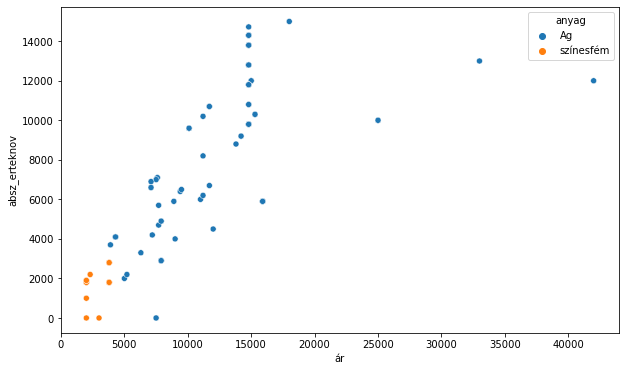

In [746]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_nemarany,x="ár",y="absz_erteknov", hue="anyag")

<AxesSubplot:xlabel='ár', ylabel='absz_erteknov'>

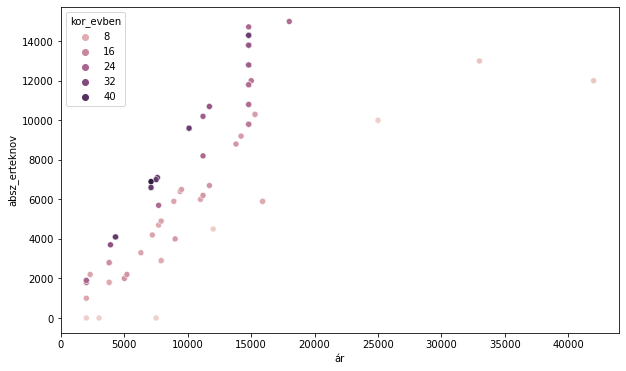

In [745]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_nemarany,x="ár",y="absz_erteknov", hue="kor_evben")

Az alábbi ábrán az árat kicseréltem a névértékre. Így már egy olyan ábrát láthatunk, ahol nincs (annyira egyértelmű) pozitív összefüggés, mint az előző ábrán. Ezt valószínűleg az okozza, hogy időközben durva infláció volt, a régi érmék névértéke viszonylag alacsony, de pont amiatt mert régiek, sok idő óta növelik az értéküket, így magas az abszolút értéknövekedésük. Tehát itt összefonódik a névérték és a kibocsátás dátuma.

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

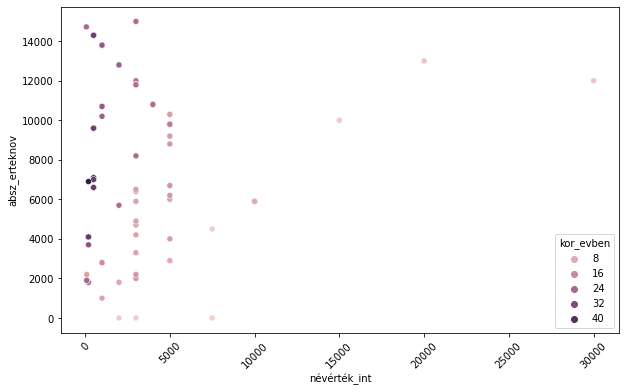

In [744]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_nemarany,x="névérték_int",y="absz_erteknov", hue="kor_evben")
plt.xticks(rotation=45)

Az alábbi ábrán azt mutatom be, hogy amit az előbb állítottam a kibocsátás dátuma és a névérték között, az igaz. A kibocsátás dátumának függvényében mutatom be a névértékeket. Látható, hogy valóban megfogyelhető a trend, miszerint régebben jellemzően kisebb névértékű érméket bocsátottak ki.

<AxesSubplot:xlabel='dátum', ylabel='névérték_int'>

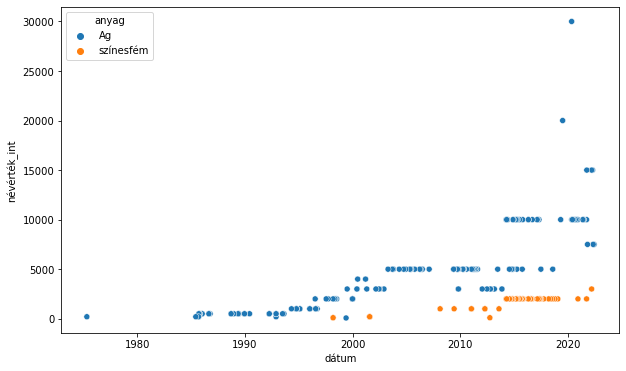

In [743]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_nemarany,x="dátum",y="névérték_int", hue="anyag")

Az alábbi ábrán az látszódik, hogy hogyan függ össze az érme kiadási dátuma és az abszolút értéknövekedés. Érdekes módon nincs annyira negatív pozitív összefüggés, mint vártam. 

<AxesSubplot:xlabel='dátum', ylabel='absz_erteknov'>

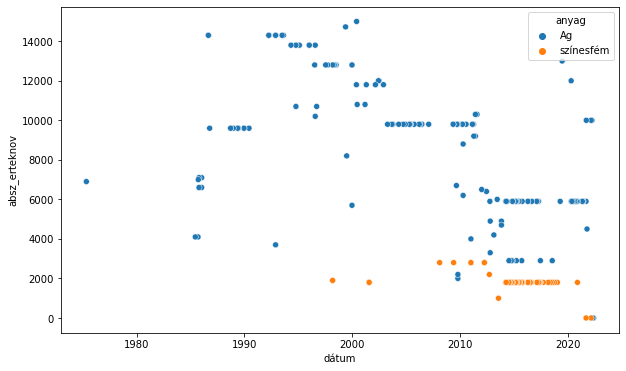

In [742]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_nemarany,x="dátum",y="absz_erteknov", hue="anyag")

Az alábbi ábra hasonlót mutat be, de itt a relatív értéknövekedést mutatja be. Látható, hogy van két igen kiugró érték. Ezeket leellenőriztem, ezek nem hibásak, valóban kiugró értékek. 

<AxesSubplot:xlabel='dátum', ylabel='rel_erteknov'>

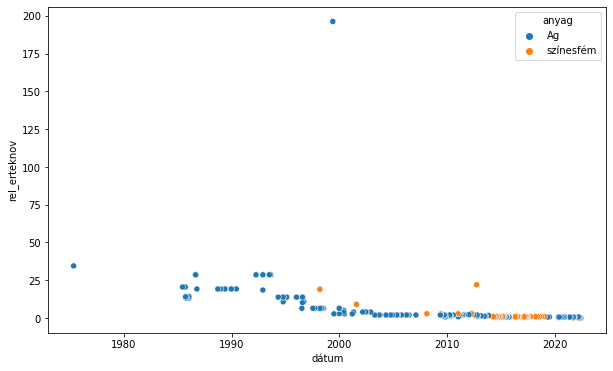

In [741]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_nemarany,x="dátum",y="rel_erteknov", hue="anyag")

In [690]:
df_nemarany[df_nemarany["rel_erteknov"]>20]

,név,egyéb,névérték,minőség,dátum,anyag,finomság,darab,átmérő,tömeg,tervező,url,ár,névérték_int,ár/gr,névérték/gr,kor,kor_evben,absz_erteknov,rel_erteknov
108,2012. évi Cserkészszövetség színesfém emlékérm...,Átmeneti készlethiány,100 Ft,PP,2012-09-28,színesfém,,10000,30 mm,10.00,Tóth Zoltán,https://penzvero.hu/termek/2012-evi-cserkeszsz...,2300,100,230.000000,10.000000,3594 days 11:53:09.349575,9.841192,2200,22.000000
176,1999. évi 75 éves a Magyar Nemzeti Bank ezüst ...,Átmenetileg nem rendelhető,75 Ft,BU,1999-05-24,Ag,.925,3000,"38,61 mm",31.46,Kiss György,https://penzvero.hu/termek/1999-evi-75-eves-a-...,14800,75,470.438652,2.383980,8470 days 11:53:09.349575,23.190952,14725,196.333333
199,1993. évi Expo’96 ezüst emlékérme PP,-,500 Ft,PP,1993-08-17,Ag,.925,80000,"38,61 mm",31.46,Gáti Gábor,https://penzvero.hu/termek/1993-evi-expo96-ezu...,14800,500,470.438652,15.893198,10576 days 11:53:09.349575,28.956866,14300,28.600000
200,1993. évi Integráció az Európai közösségbe ezü...,-,500 Ft,BU,1993-07-01,Ag,.925,10000,"38,61 mm",31.46,Bognár György,https://penzvero.hu/termek/1993-evi-integracio...,14800,500,470.438652,15.893198,10623 days 11:53:09.349575,29.085545,14300,28.600000
202,1992. évi Telstar ezüst emlékérme BU,-,500 Ft,BU,1992-11-23,Ag,.925,5000,"38,61 mm",31.46,Bognár György,https://penzvero.hu/termek/1992-evi-telstar-ez...,14800,500,470.438652,15.893198,10843 days 11:53:09.349575,29.687872,14300,28.600000
203,1992. évi Telstar ezüst emlékérme PP,-,500 Ft,PP,1992-11-23,Ag,.925,15000,"38,61 mm",31.46,Bognár György,https://penzvero.hu/termek/1992-evi-telstar-ez...,14800,500,470.438652,15.893198,10843 days 11:53:09.349575,29.687872,14300,28.600000
205,1992. évi Károly Róbert ezüst emlékérme BU,-,500 Ft,BU,1992-04-06,Ag,.900,10000,40 mm,28.00,Kis Nagy András,https://penzvero.hu/termek/1992-evi-karoly-rob...,14800,500,528.571429,17.857143,11074 days 11:53:09.349575,30.320316,14300,28.600000
206,1992. évi Károly Róbert ezüst emlékérme PP,-,500 Ft,PP,1992-04-06,Ag,.900,20000,40 mm,28.00,Kis Nagy András,https://penzvero.hu/termek/1992-evi-karoly-rob...,14800,500,528.571429,17.857143,11074 days 11:53:09.349575,30.320316,14300,28.600000
217,1986. évi Buda visszafoglalása ezüst emlékérme,-,500 Ft,BU,1986-08-28,Ag,.900,20000,40 mm,28.00,"Csíkszentmihályi Róbert, Tóth Sándor",https://penzvero.hu/termek/1986-evi-buda-vissz...,14800,500,528.571429,17.857143,13122 days 11:53:09.349575,35.927434,14300,28.600000
218,1986. évi Buda visszafoglalása ezüst emlékérme PP,-,500 Ft,PP,1986-08-28,Ag,.900,10000,40 mm,28.00,"Csíkszentmihályi Róbert, Tóth Sándor",https://penzvero.hu/termek/1986-evi-buda-vissz...,14800,500,528.571429,17.857143,13122 days 11:53:09.349575,35.927434,14300,28.600000


Az alábbiakban összehasonlítom az ezüst és a színesfém érméket

In [691]:
df[df["anyag"]=="Au"].mean()

<ipython-input-691-7bc46eaedb1a>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df["anyag"]=="Au"].mean()


darab                            3942.307692
tömeg                               5.389154
ár                             146230.769231
névérték_int                         32500.0
ár/gr                           30023.026622
névérték/gr                      8999.062547
kor             2942 days 12:48:32.426498048
kor_evben                           8.056218
dtype: object

In [692]:
df[df["anyag"]=="Ag"].mean()

<ipython-input-692-2d6a1e6b77ea>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df["anyag"]=="Ag"].mean()


darab                            8859.060403
tömeg                              27.886711
ár                              13446.979866
névérték_int                     4765.604027
ár/gr                             494.632202
névérték/gr                       183.223614
kor             6255 days 01:44:17.805950784
kor_evben                          17.125455
dtype: object

In [693]:
df[df["anyag"]=="színesfém"].mean()

<ipython-input-693-c8d3e2f98346>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df["anyag"]=="színesfém"].mean()


darab                            7192.307692
tömeg                              17.341538
ár                               3478.846154
névérték_int                     1636.538462
ár/gr                             306.368631
névérték/gr                       141.187734
kor             3145 days 18:20:50.888036512
kor_evben                           8.612634
dtype: object

A fenti három átlag-táblazat adataiból jól látszódik, hogy mennyire mások az arany, az ezüst és a színesfém emlékérmék. Az aranyérmék mai átlagára majdnem 150 ezer forint, az ezüstöké 13 ezer fölött van, a színesfémeké pedig 3500 forint környékén. Ez egyébként logikus, a fém értéke alapján is ezt várhattuk. A darabszámoknál megfigyelhető, hogy míg aranypénzekből átlagosan 4000 darabot adtak ki, ezüstből ez a 9 ezret közelítette. Érdekes módon a színesfém pénzek darabszáma a kettő között volt, nem adtak ki belőlük többet, mint az ezüstpénzekből. Az ezüst és az arany pénzeknél érdemes megfigyelni a grammonkénti árat, illetve a grammonkénti névértéket. Mindkét értéknél azt látjuk, hogy mindkét csoportban az alapanyag fém világpiaci áránál lényegesen magasabb, tehát a pénzek értékét nem pusztán a tartalmazott nemesfém adja. (Érdemes megjegyezni, hogy itt nem csak a közelmúltban kiadott  érmék vannak, az infláció miatt az itt látható értéknél lényegesen magasabb volt a névérték értéke a legtöbbnél, mint most, vagyis az előző megállapítás csak még erősebben igazolódna, ha az inflációt is beleszámítanám.)

Csinálok egy fiatal érmek df-et, hogy bemutassam, hogy ez igaz. Ezeknél az érméknél a fiatalságuk miatt az infláció hatása még kicsi. Valóban látható, hogy mindkét csoportnál feljebb ment a  grammonkénti névérték.

In [694]:
df_fiatal=df[df["kor_evben"]<5]

In [695]:
df_fiatal[df_fiatal["anyag"]=="Ag"]["névérték/gr"].mean()

394.3974920179577

In [696]:
df_fiatal[df_fiatal["anyag"]=="Au"]["ár/gr"].mean()

28491.99491165693

<AxesSubplot:xlabel='dátum', ylabel='éves értéktöbbszöröződés'>

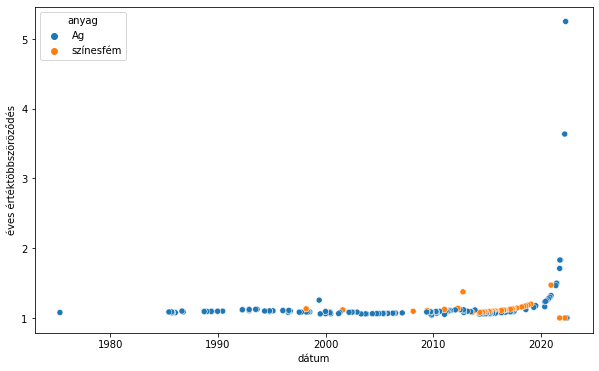

In [747]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_nemarany,x="dátum",y="éves értéktöbbszöröződés", hue="anyag")

<AxesSubplot:xlabel='névérték_int', ylabel='éves értéktöbbszöröződés'>

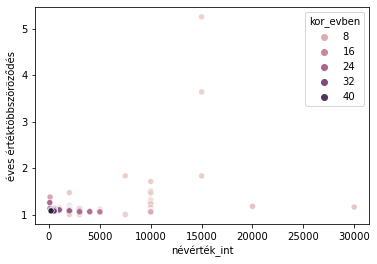

In [713]:
sns.scatterplot(data=df_nemarany,x="névérték_int",y="éves értéktöbbszöröződés", hue="kor_evben")

<AxesSubplot:xlabel='névérték_int', ylabel='éves értéktöbbszöröződés'>

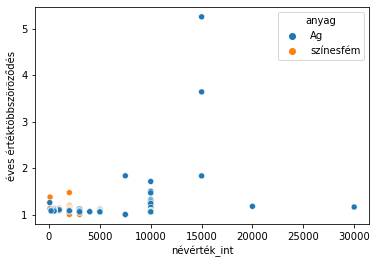

In [714]:
sns.scatterplot(data=df_nemarany,x="névérték_int",y="éves értéktöbbszöröződés", hue="anyag")